# Lecture 3, Solving Systems of ODE's and Newton's 2nd law


**Overview:**
* Reducing nth order ODE's to 1st order.
* Solving Newton's 2nd law.
    * A simple fix for the Euler method: Reading Euler-Cromer method Euler_Cromer.pdf
* Intro to object oriented programing in Python, beginning to develop our "particle" class.

**Next Lecture:** Developing a physical model and more object oriented practice, continuing development of our particle class.

---

In this lecture workbook, we will begin to explore object oriented programming in python. We will do this by developing a class called `particle.py` that will be used throughout most of PHYS 1600/2600.  

In this workbook, we will begin developing our class within the Jupyter Notebook. This is a good workflow for rapid testing and modifying our class, but is not efficient in the long-run. In the next lecture, we will move our class outside of the Jupyter notebook and into a separate .py file. We will then use an `import` statement inside of a separate notebook any time we would like to use our class. 

### Tasks:

**Understanding the class structure**

---

1. Create an instance of the Particle class called "free_ball". Explore the attributes of free_ball, do you understand what `__init__` is doing? Do you understand what the purpose of the argument `self` is ?
2. Try calling the Euler_step method of free_ball a number of times. After each call to Euler_step use the results method to display the current position and velocity. Do you understand how this is working?
2.  Create an instance of the FallingParticle subclass called "fall_ball". Explore the attributes of fall_ball, how do they compare with free_ball? Are any attributes the same? Are any different?
3. Calculate the trajectory of a particle falling under gravity using the Euler method.
4. Plot the trajectory.

**Extending the class and exploring limitations of our numerical method**

---

5. Create a sub-class of Particle for a 1-Dimensional particle in a simple harmonic potential.
6. Create an instance of your new simple harmonic potential subclass called SHO.
6. Generate phase space and trajectory plots for SHO, comparing the exact and  Euler solutions. You might want to extend your previous plot method to do this. What do you notice?
6. In the SHO sub-class, include a method to calculate the total energy of the SHO, plot the relative error in energy for the Euler solution.
7. Reading: Newman 8.1 - 8.4 and Euler_Cromer.pdf.
 
 
 

**The Particle class is defined below**

In [1]:
import matplotlib.pyplot as plt # for plotting          
import numpy as np
%matplotlib notebook  

class Particle (object):

    """Class that describes particle"""
    def __init__(self, m = 1.0, y0=1.0, v0=0.0,  tf = 10.0, dt = 0.01):
        '''
        This is the initialization method. It is run automatically everytime a new instance of our particle class
        is created. 
        '''
        
        print("Particle init'ed")
        self.m = m
        self.y = y0
        self.v = v0
        self.t = 0.0
        self.tf = tf
        self.dt = dt
        npoints = int(tf/dt) # always starting at t = 0.0
        self.npoints = npoints
        self.tarray = np.linspace(0.0, tf,npoints, endpoint = True) # include final timepoint
        
    def F(self, y, v, t):
        '''
        force on a free particle
        F = 0.0
        '''
        return 0.0

    def Euler_step(self): 
        '''
        Method to increment a single time step.
        '''
        a = self.F(self.y, self.v, self.t) / self.m
        self.y += self.v * self.dt
        self.v += a * self.dt
        self.t += self.dt

    def trajectory(self):
        '''
        Loop over time steps to generate a trajectory
        
        '''
        y_array = []
        v_array = []
        
        for ii in range(self.npoints):
            v_array.append(self.v)
            y_array.append(self.y)
            
            #propagate in time using an Euler Method
            self.Euler_step()
        
        self.y_array = np.array(y_array)
        self.v_array = np.array(v_array)

    def plot(self):
        fig1 = plt.figure(figsize = [8,4])
        ax1 = fig1.add_subplot(121)
        ax2 = fig1.add_subplot(122)
        
        ax1.plot(self.tarray, self.y_array, "k", label = 'euler')
        ax2.plot(self.y_array, self.v_array, "k", label = 'euler')
    
    
        ax1.set_title('Trajectory')
        ax1.set_xlabel("t")
        ax1.set_ylabel("x")
        
        ax2.set_title('Phase space')
        ax2.set_xlabel("v")
        ax2.set_ylabel("x")

        ax1.legend()
        ax2.legend()

    def results(self):
        """" 
        Method to display the results at a given final time
        """
        
        print('\nPosition and Velocity at Final Time:')
        print('Euler:')
        print('t = {0:0.2f} s | y = {1:0.3f} m | v = {2:0.3f} m/s'.format(self.t, self.y , self.v))

Below, we create a new class spawned from our Particle class. This FallingParticle class inherits the methods of the parent class: Particle. 

In [7]:
class FallingParticle (Particle):
    """
    Subclass of Particle Class that describes a falling particle
    """

    def __init__(self,m = 1.0, x0 = 1.0 , v0 = 0.0, tf = 10.0,  dt = 0.1):
        
        print("Falling particle init'd")
        super().__init__(m,x0,v0,tf,dt)   # call initialization method of the super (parent) class
        
        # use super() instead of 
        # Particle.__init__(self)
        
        #what does super do?
        #From Stack Overflow:
        #def __init__(self):
        #    mro = type(self).mro()             # Get the Method Resolution Order.
        #    check_next = mro.index(ChildB) + 1 # Start looking after *this* class.
        #    while check_next < len(mro):
        #        next_class = mro[check_next]
        #    if '__init__' in next_class.__dict__:
        #        next_class.__init__(self)
        #        break
        #    check_next += 1
    
    def F(self, x, v, t):
        '''
        Force on a particle moving under a gravitational field near the Earth's surface.
        F = mg
        '''
        
        g = 9.8
        #return  -self.g*self.m
        return -g*self.m

In [3]:
free_ball = Particle(m = 10)
free_ball.results()

Particle init'ed

Position and Velocity at Final Time:
Euler:
t = 0.00 s | y = 1.000 m | v = 0.000 m/s


In [4]:
for i in range(10):
    free_ball.Euler_step()
    free_ball.results()


Position and Velocity at Final Time:
Euler:
t = 0.01 s | y = 1.000 m | v = 0.000 m/s

Position and Velocity at Final Time:
Euler:
t = 0.02 s | y = 1.000 m | v = 0.000 m/s

Position and Velocity at Final Time:
Euler:
t = 0.03 s | y = 1.000 m | v = 0.000 m/s

Position and Velocity at Final Time:
Euler:
t = 0.04 s | y = 1.000 m | v = 0.000 m/s

Position and Velocity at Final Time:
Euler:
t = 0.05 s | y = 1.000 m | v = 0.000 m/s

Position and Velocity at Final Time:
Euler:
t = 0.06 s | y = 1.000 m | v = 0.000 m/s

Position and Velocity at Final Time:
Euler:
t = 0.07 s | y = 1.000 m | v = 0.000 m/s

Position and Velocity at Final Time:
Euler:
t = 0.08 s | y = 1.000 m | v = 0.000 m/s

Position and Velocity at Final Time:
Euler:
t = 0.09 s | y = 1.000 m | v = 0.000 m/s

Position and Velocity at Final Time:
Euler:
t = 0.10 s | y = 1.000 m | v = 0.000 m/s


In [8]:
fall_ball = FallingParticle()
fall_ball.results()
for i in range(10):
    fall_ball.Euler_step()
    fall_ball.results()

Falling particle init'd
Particle init'ed

Position and Velocity at Final Time:
Euler:
t = 0.00 s | y = 1.000 m | v = 0.000 m/s

Position and Velocity at Final Time:
Euler:
t = 0.10 s | y = 1.000 m | v = -0.980 m/s

Position and Velocity at Final Time:
Euler:
t = 0.20 s | y = 0.902 m | v = -1.960 m/s

Position and Velocity at Final Time:
Euler:
t = 0.30 s | y = 0.706 m | v = -2.940 m/s

Position and Velocity at Final Time:
Euler:
t = 0.40 s | y = 0.412 m | v = -3.920 m/s

Position and Velocity at Final Time:
Euler:
t = 0.50 s | y = 0.020 m | v = -4.900 m/s

Position and Velocity at Final Time:
Euler:
t = 0.60 s | y = -0.470 m | v = -5.880 m/s

Position and Velocity at Final Time:
Euler:
t = 0.70 s | y = -1.058 m | v = -6.860 m/s

Position and Velocity at Final Time:
Euler:
t = 0.80 s | y = -1.744 m | v = -7.840 m/s

Position and Velocity at Final Time:
Euler:
t = 0.90 s | y = -2.528 m | v = -8.820 m/s

Position and Velocity at Final Time:
Euler:
t = 1.00 s | y = -3.410 m | v = -9.800 m/

Falling particle init'd
Particle init'ed


Text(0, 0.5, 'v (m/s)')

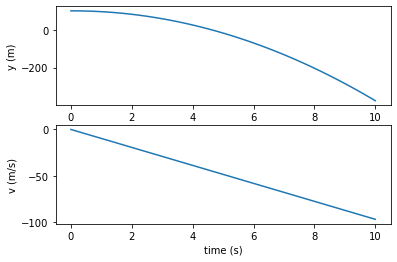

In [17]:
fp = FallingParticle(x0=100.0)
fp.trajectory()

%matplotlib inline

fig, axs = plt.subplots(2,1)
plt.axes(axs[0])
plt.plot(fp.tarray,fp.y_array)
plt.xlabel('time (s)')
plt.ylabel('y (m)')
plt.axes(axs[1])
plt.plot(fp.tarray,fp.v_array)
plt.xlabel('time (s)')
plt.ylabel('v (m/s)')

SHO particle init'd
Particle init'ed


Text(0, 0.5, 'v (m/s)')

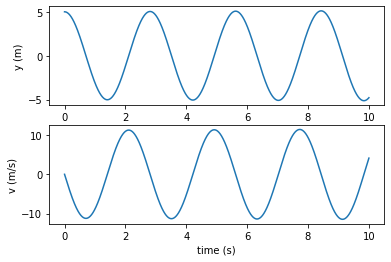

In [26]:
class SimpleHarmonicOscillator(Particle):
    def __init__(self,m = 1.0, y0 = 1.0 , v0 = 0.0, tf = 10.0,  dt = 0.001, k=1.0):
        print("SHO particle init'd")
        super().__init__(m,y0,v0,tf,dt)
        self.k = k
    
    def F(self, y, v, t):
        return -self.k*self.y

SHO = SimpleHarmonicOscillator(y0=5.0,k=5.0)
SHO.trajectory()

fig, axs = plt.subplots(2,1)
plt.axes(axs[0])
plt.plot(SHO.tarray,SHO.y_array)
plt.xlabel('time (s)')
plt.ylabel('y (m)')
plt.axes(axs[1])
plt.plot(SHO.tarray,SHO.v_array)
plt.xlabel('time (s)')
plt.ylabel('v (m/s)')